In [28]:
using PlotlyJS
# using XLSX
include("../model/utils.jl")
# include("../model/unit_commitment.jl")
# include("../model/economic_dispatch.jl")
include("./plotting.jl")
include("./processing.jl")
# XLSX.writetable(joinpath(folder_path,"LOL_CUR.xlsx"), "LOL_CUR" => change_type(LOL_CUR, Symbol, string))

calculate_reserve_gcd_KPI (generic function with 1 method)

In [29]:
folder_path = joinpath("..","output", "solutions_v29.1u")
gcdi_KPI_adequacy = read_parquet_and_convert(joinpath(folder_path,"all_gcdi_KPI_adequacy.parquet"))
gcd_KPI_adequacy = read_parquet_and_convert(joinpath(folder_path,"all_gcd_KPI_adequacy.parquet"))
KPI_reserve = read_parquet_and_convert(joinpath(folder_path,"all_KPI_reserve.parquet"))
gcdi_KPI_reserve = read_parquet_and_convert(joinpath(folder_path,"all_gcdi_KPI_reserve.parquet"))
gcd_KPI_reserve = read_parquet_and_convert(joinpath(folder_path,"all_gcd_KPI_reserve.parquet"))
;

../output/solutions_v29.1u/all_gcdi_KPI_adequacy.parquet
../output/solutions_v29.1u/all_gcd_KPI_adequacy.parquet
../output/solutions_v29.1u/all_KPI_reserve.parquet
../output/solutions_v29.1u/all_gcdi_KPI_reserve.parquet
../output/solutions_v29.1u/all_gcd_KPI_reserve.parquet


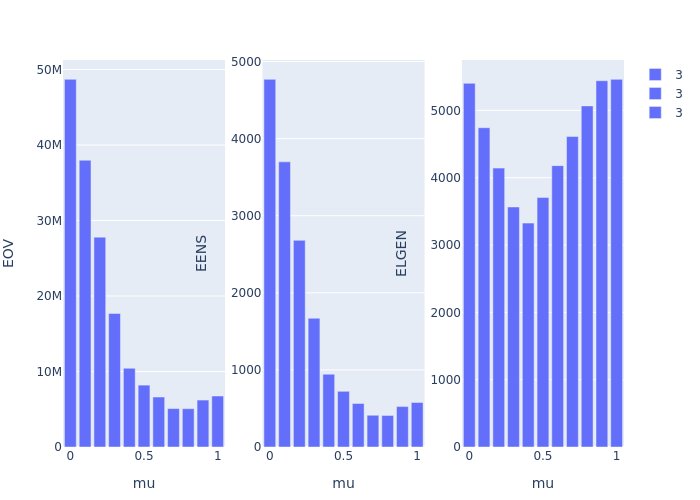

In [30]:
p1 = plot(gcd_KPI_adequacy, x = :mu, y = :EOV, color = :day, kind = "bar")
p2 = plot(gcd_KPI_adequacy, x = :mu, y = :EENS, color = :day, kind = "bar")
p3 = plot(gcd_KPI_adequacy, x = :mu, y = :ECUR, color = :day, kind = "bar")
p4 = plot(gcd_KPI_adequacy, x = :mu, y = :ELGEN, color = :day, kind = "bar")
# p4 = plot(gcd_KPI_adequacy, x = :mu, y = :ELGEN, color = :day)
# p3 = plot(KPI, x = :mu, y = :LOLE, color = :day)
[p1 p2 p4]
# savefig([p1 p2 p3 p4], "adecuacy KPIs v1.png", width=12*scale, height=6*scale)

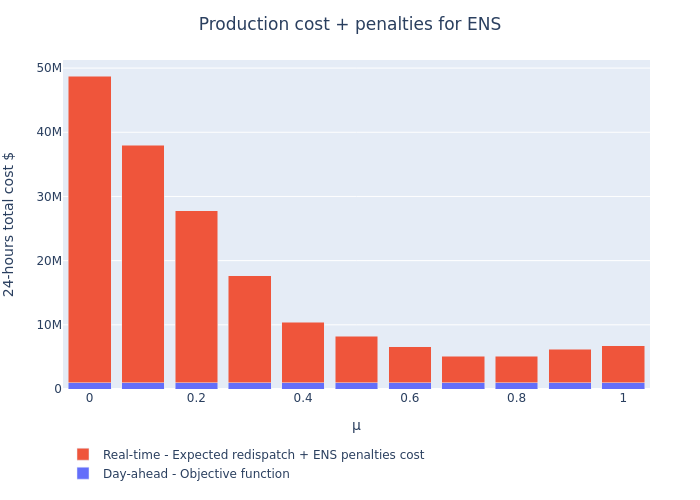

In [31]:
iteration_ = :demand_52
day_ = 3
s1 = bar(filter(:day =>x -> x == day_, gcd_KPI_adequacy), x = :mu, y = :objective_value_uc,  name = "Day-ahead - Objective function") # Layout(yaxis_title ="cost [US]")
s2 = bar(filter(:day =>x -> x == day_, gcd_KPI_adequacy), x = :mu, y = :EΔOV, name = "Real-time - Expected redispatch + ENS penalties cost")
plot([s1,s2], Layout(barmode="stack",title = attr(text = "Production cost + penalties for ENS", xanchor = "center", x=0.5), xaxis_title = "μ", yaxis_title ="24-hours total cost \$", 
legend=attr(
        x=0,
        y=-0.3,
        yanchor="bottom",
        xanchor="left",
        orientation="h"
    ))
)

### Undelivered reserve

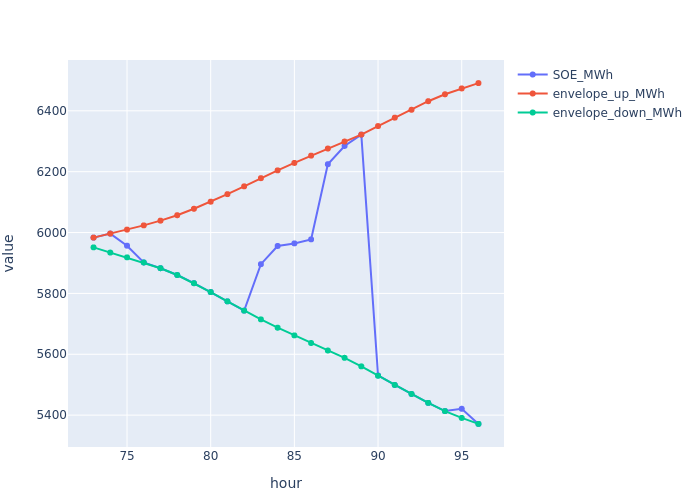

In [32]:
mu_ = 0.1
to_plot = filter([:iteration, :day, :mu] => (x,y,z) -> (x.==iteration_).&(y.==day_).&(z.== mu_), KPI_reserve)
to_plot = stack(to_plot,[:SOE_MWh, :envelope_up_MWh, :envelope_down_MWh])
plot(to_plot, x =:hour, y = :value, group = :variable, facet_col = :configuration, mode="markers+lines")

┌ Warning: One of color or symbol present AND group -- group will be ignored
└ @ PlotlyBase /home/ubuntu/.julia/packages/PlotlyBase/4NWbR/src/dataframes_api.jl:247
┌ Warning: One of color or symbol present AND group -- group will be ignored
└ @ PlotlyBase /home/ubuntu/.julia/packages/PlotlyBase/4NWbR/src/dataframes_api.jl:247


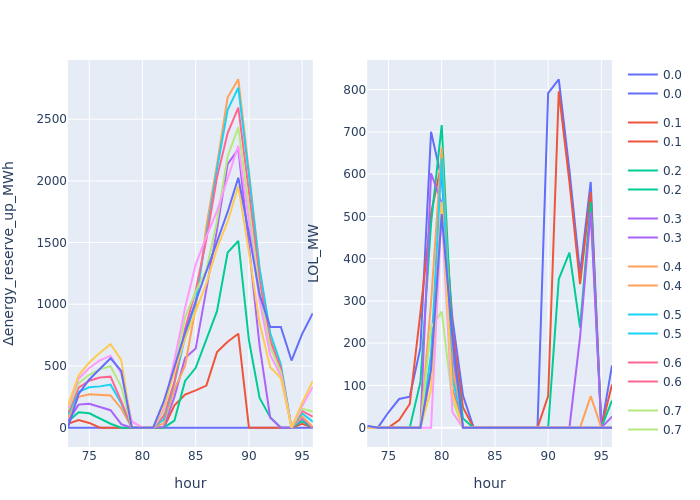

In [33]:
# to_plot = KPI_reserve[(KPI_reserve.iteration .== iteration_),:]
to_plot = filter(:iteration => ==(iteration_), KPI_reserve)
p1 = plot(to_plot, x = :hour, y = :Δenergy_reserve_up_MWh, color = :mu, group = :day)
p2 = plot(to_plot, x = :hour, y = :LOL_MW, color = :mu, group = :day)
# mu_ = 0.5
# to_plot = KPI_reserve[(KPI_reserve.iteration .== iteration_),:]
# to_plot = filter([:iteration, :day, :mu] => (x,y,z) -> (x.==iteration_).&(y.==day_).&(z.== mu_), KPI_reserve)
# s1 = scatter(to_plot, x = :hour, y = :Δenergy_reserve_up_MWh, group = :day, name = "Δenergy_reserve_up_MWh - mu = $(mu_)")
# s2 = scatter(to_plot, x = :hour, y = :LOL_MW, group = :day,name = "LOL_MW - mu = $(mu_)")
# union!(s1,s2)
# p2= plot(s1)
[p1 p2]

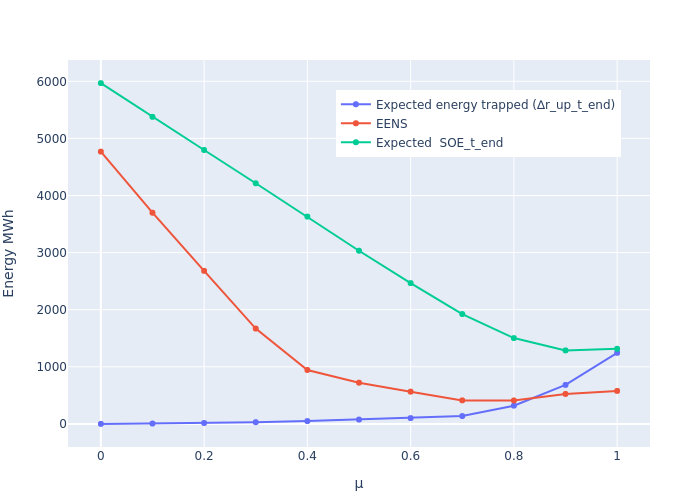

In [35]:
to_plot = gcd_KPI_reserve[gcd_KPI_reserve.day .== day_,:]
s1 = scatter(to_plot, x = :mu, y = :E_final_Δenergy_reserve_up_MWh, group = :day, name = "Expected energy trapped (∆r_up_t_end)")
s3 = scatter(to_plot, x = :mu, y = :E_final_SOE_MWh, group = :day, name = "Expected  SOE_t_end")
to_plot = gcd_KPI_adequacy[gcd_KPI_adequacy.day .== day_,:]
s2 = scatter(to_plot, x = :mu, y = :EENS, group = :day, name = "EENS")

union!(s1,s2,s3)
plot(s1, Layout(yaxis_title= "Energy MWh", xaxis_title="μ",
    legend=attr(
        x=0.95,
        y=0.75,
        yanchor="bottom",
        xanchor="right",
        orientation="h"
    ))
)

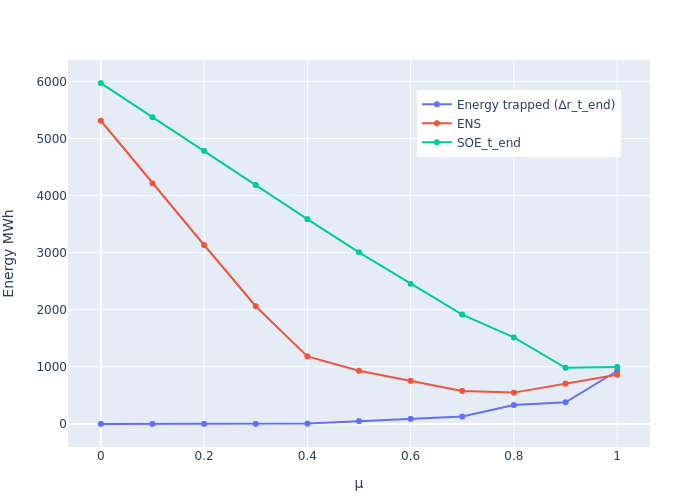

In [36]:


to_plot = filter([:day,:iteration] => (x,y) -> (x.==day_) .& (y.==iteration_), gcdi_KPI_reserve)
s1 = scatter(to_plot, x = :mu, y = :final_Δenergy_reserve_up_MWh, group = :day, name = "Energy trapped (∆r_t_end)")
s3 = scatter(to_plot, x = :mu, y = :final_SOE_MWh, group = :day, name = "SOE_t_end")
to_plot = filter([:day,:iteration] => (x,y) -> (x.==day_) .& (y.==iteration_), gcdi_KPI_adequacy)
s2 = scatter(to_plot, x = :mu, y = :ENS_MWh, group = :day, name = "ENS")

union!(s1,s2,s3)
plot(s1, Layout(yaxis_title= "Energy MWh", xaxis_title="μ",
    legend=attr(
        x=0.95,
        y=0.75,
        yanchor="bottom",
        xanchor="right",
        orientation="h"
    ))
)

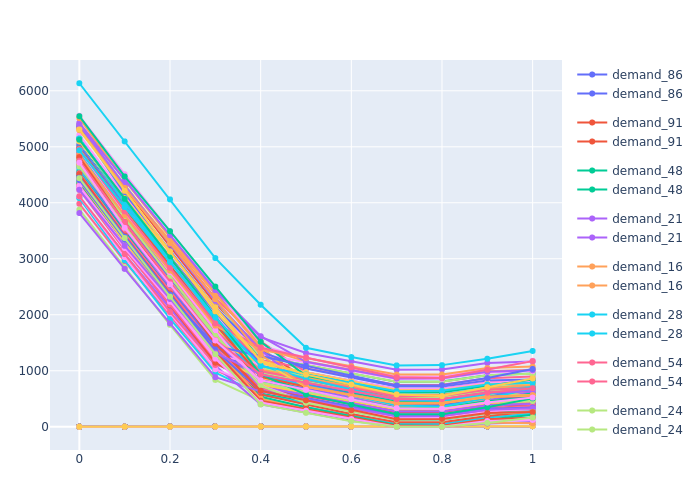

In [37]:
# to_plot = gcdi_KPI_reserve[gcdi_KPI_reserve.day .== day_,:]
# p1 = plot(scatter(to_plot, x = :mu, y = :final_stored_energy_reserve_up_MWh, group = :iteration))
# to_plot  = gcdi_KPI_adequacy[gcdi_KPI_adequacy.day .== day_,:]
# p2 = plot(scatter(to_plot, x = :mu, y = :ENS_MWh, group = :iteration))
# [p1 p2]

to_plot = gcdi_KPI_reserve[gcdi_KPI_reserve.day .== day_,:]
s1 = scatter(to_plot, x = :mu, y = :final_stored_energy_reserve_up_MWh, group = :iteration, color ="red")
# s3 = scatter(to_plot, x = :mu, y = :E_final_SOE_MWh, group = :day, name = "Expected  SOE_t_end")
to_plot = gcdi_KPI_adequacy[gcdi_KPI_adequacy.day .== day_,:]
s2 = scatter(to_plot, x = :mu, y = :ENS_MWh, group = :iteration, color ="blue")

union!(s1,s2)
plot(s1,
    # Layout(yaxis_title= "Energy MWh", xaxis_title="μ",
    # legend=attr(
    #     x=0.95,
    #     y=0.75,
    #     yanchor="bottom",
    #     xanchor="right",
    #     orientation="h"
    # ))
)

### Redispatch probability
Redispatch = LOL - LGEN
Redispatch is considered to be needed when sign(redispatch*reserve_needed)>0. Cases when reserve_needed>0 but redispatch<0 (i.e., LGEN>0) are considered economic deviations of the RT problem

In [38]:
function redispatch_prob(r_relative_min, r_relative_max, required_reserve, number_key)
    out =  combine(groupby(required_reserve, [:configuration, :mu]), [:required_r_relative, :redispatch_needed] => ((x,y) -> 100*sum((x.>=r_relative_min).*(x.<=r_relative_max).*y)/sum((x.>=r_relative_min).*(x.<=r_relative_max))) => :redispatch_probability)
    out.r_max_relative .= number_key
    return out
end
combine(groupby(KPI_reserve, [:configuration, :mu]), [:required_r_relative, :redispatch_needed] => ((x,y) -> sum((x.>=0).*(x.<=0.1))) => :redispatch_probability)
;

KPI_reserve

In [39]:
redispatch_probability = vcat(
    vcat([redispatch_prob(0, r_max, KPI_reserve, r_max) for r_max in 0.0:0.01:0.15]...),
    vcat([redispatch_prob(-r_max, 0, KPI_reserve, -r_max) for r_max in 0.0:0.01:0.15]...)
)
sort!(redispatch_probability, :r_max_relative)
# redispatch_probability = vcat([redispatch_prob(-r_max, r_max, required_reserve, r_max) for r_max in 0.0:0.01:0.2]...)
p1 = plot(redispatch_probability, x = :r_max_relative, y = :redispatch_probability, color = :mu, Layout(title = "Redispatch probability", yaxis_title = "probability  [%]", xaxis_title = "required reserve [%]"), mode="markers+lines")
p2 = plot(filter(:mu => x -> ismissing(x) ? false : x == 1, redispatch_probability), x = :r_max_relative, y = :redispatch_probability, Layout(title = "Redispatch probability mu = 1 ", yaxis_title = "probability  [%]", xaxis_title = "required reserve [%]"), name = "1.0", mode="markers+lines", marker=attr(color="black"))
p3 = plot(filter(:day => x -> x in [day_], KPI_reserve), x = :required_r_relative, y = :redispatch_MW, color = :mu, mode = "markers")
[p1 p2 p3]

Sanity check: Figue 2 should exhibit 0 redispatch probability when required reserve >0 for mu = 1
Points of quadrant IV in Figure 3 are not considered as redispatching actions


In [ ]:
p2 = plot(filter(:day => x -> x in [day_], KPI_reserve), x = :required_r_relative, y = :mu, facet_col = :redispatch_needed, facet_row = :day, mode = "markers", Layout(height=800))
# p2 = plot(filter(:mu => x -> ismissing(x) ? false : x == 1, KPI_reserve), x = :required_r_relative, y = :mu, facet_col = :redispatch_needed, mode = "markers", Layout(height=800))

In [ ]:
p1 = plot(gcdi_KPI_adequacy, y = :Δobjective_value_relative_ref_conf, x = :mu, color = :iteration)
p2 = plot(gcdi_KPI_adequacy, y = :ENS_MWh, x = :mu, color = :iteration)
p3 = plot(gcdi_KPI_adequacy, y = :LGEN_MWh, x = :mu, color = :iteration)
p4 = plot(gcdi_KPI_adequacy, y = :CUR_MWh, x = :mu, color = :iteration)
[p1 p2; p3 p4]

In [ ]:
p1 = plot(gcdi_KPI_adequacy, y = :Δobjective_value_relative_ref_conf, x = :mu, facet_col = :day, color = :iteration)
[p1;]

## Revise code

In [ ]:
p1 = plot(gcd_KPI_reserve, x = :mu, y = :delivered_r_up_ratio, color = :day)
p2 = plot(gcd_KPI_reserve, x = :mu, y = :delivered_r_dn_ratio, color = :day)
p3 = plot(gcd_KPI_reserve, x = :mu, y = :E_delivered_r_up_MWh, color = :day)
p4 = plot(gcd_KPI_reserve, x = :mu, y = :E_deliverered_dn_MWh, color = :day)
# [p1 p2; p3 p4]
[p1 p2]

## Deprecated

In [ ]:
reserve_thrs = 0.1+0.0001
group_by = [:configuration, :day, :iteration]

ov = leftjoin(
    gcdi_KPI_adequacy[:,union(group_by,[:objective_value, :OPEX, :ENS_MWh])],
    combine(groupby(KPI_reserve, group_by), :required_r_relative => (x-> all(abs.(x) .<= reserve_thrs))  => :required_reserve_within_margins),
    on = group_by
)

eov = combine(groupby(ov, [:configuration, :day, :required_reserve_within_margins]), [:objective_value, :OPEX, :ENS_MWh] .=> mean .=> [:EOV, :EOPEX, :EENS])
sort!(transform!(eov, :configuration .=> ByRow(x -> parse_configuration_to_mu(x)) .=> :mu), :mu)

[plot(eov, x = :mu, y = :EOV, color = :day, facet_col = :required_reserve_within_margins) plot(eov, x = :mu, y = :EENS, color = :day, facet_col = :required_reserve_within_margins)]

In [ ]:
# function check_loq_value(df, field, value, accuracy)
#     filter = (df[!,field] .> value) .& (df[!,field] .< Inf) .& (.!isnan.(df[!,field]))
#     filter = (df[!,field].*filter .-value) .< accuracy
#     println(all(filter))
#     return df[.!filter,:]

# end
# # Check
# accuracy = 0.000001
# check_loq_value(KPI_reserve, :delivered_r_up_ratio, 1, accuracy)
# check_loq_value(KPI_reserve, :delivered_r_dn_ratio, 1, accuracy)
;
# balance = (KPI_reserve.required_r_up_MW .-KPI_reserve.required_r_dn_MW) .- (KPI_reserve.delivered_r_up_MW .- KPI_reserve.delivered_r_dn_MW .+ KPI_reserve.LOL_MW.*(required.>=0))
# println(all(abs.(balance) .<= accuracy))
# Todo: re-calcualte balance balance
# p1 = plot(gcdi_KPI_adequacy, y = :Δobjective_value_relative_ref_conf, x = :ENS_MWh, mode = "markers", facet_col = :day, color= :configuration, text =:iteration) 
# p1 = plot(gcdi_KPI_adequacy, y = :Δobjective_valuef, x = :ENS_MWh, mode = "markers", facet_col = :day, color= :configuration, text =:iteration)
# p1 = plot(gcdi_KPI_adequacy, y = :objective_value, x = :ENS_MWh, mode = "markers", color= :configuration, text =:iteration)
# p2 = plot(gcdi_KPI_adequacy, y = :Δobjective_value_relative_ref_conf, x = :ENS_MWh, mode = "markers", color= :configuration, text =:iteration)
# p3= plot(gcdi_KPI_adequacy, y = :Δobjective_value_relative, x = :ENS_MWh, mode = "markers", color= :configuration, text =:iteration)
# relayout([p1;p2;p3], height=800)